# TODO
1. ~~Plot gradients and loss (log parser from utils)~~
- ~~retrain 512 and 1024 coeffs...~~
2. ~~get LCA models to converge.~~
3. ~~plot marginal distributions of the coefficients~~
1. With lam = .1 dictionary, infer coeffs for lam = 0. Try training dictionary for .01 or .001
2. ~~Reconstruct whole images~~
3. Sampled images from models, for L1 sparse coding draw coeffs from laplace distribution. for l0, draw from laplace and then threshold
4. White noise dictionary, varying lambda
- whitened PCA and SYM issues with ill-conditioned covariance matrix.
- why is mse calculation off in rd function for alt models?
- ~~fix patch stitching code~~


- FT whiten, invert only 1/f 
- fully connected w reLus/mayb sigmoid or tanh with and without GDN bottleneck autoencoder
- ~~standardize data bug~~
- ~~RND, SYM~~
- ~~change discretization for coeffs = 0~~
- ~~peak SNR instead of MSE. SNR of 20 decibels is indistinguishable for ppl~~
- ~~Plot colors as overcompleteness~~
- ~~MSE vs. sparsity~~
- ~~log mse on y, compare to Betghe plots~~
- ~~Add sparsity labels to RD curves~~


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os                                                                       
import numpy as np    
import scipy as sp
import time
import h5py
import pandas as pd
import pickle
from collections import OrderedDict
from IPython.display import IFrame
from IPython.display import Image
import data.data_selector as ds
from data.dataset import Dataset
import data.vanHateren as vh
import utils.plot_functions as pf                                               
import utils.data_processing as dp 
import utils.notebook as nb
import utils.log_parser as lp
import params.param_picker as pp
import bases as b
sns.set_style('darkgrid')

# RG Comparisons Vector Quantization

In [5]:
rd_rg = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rg_zca/coeffs/rd_rg_zca_wht')

In [6]:
rd_ica = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica_zca_wht/coeffs/rd_ica_zca_wht')

In [67]:
rd_lca_01 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_zca_wht/coeffs/rd_lca_zca')

In [68]:
rd_lca_03 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_zca_wht/coeffs/rd_lca_zca_03')

In [69]:
rd_lca_05 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_zca_wht/coeffs/rd_lca_zca_05')

In [70]:
frames = [rd_rg, rd_ica, rd_lca_01, rd_lca_03, rd_lca_05]

In [71]:
rd_all = pd.concat(frames)

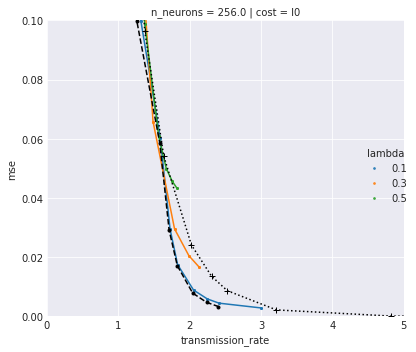

In [75]:
pf.full_comparison_plots(rd_all, pca_table=rd_rg, ica_table=rd_ica, x='transmission_rate', ylim=.1)

In [82]:
rd_rg_uniform_v2

,model,n_neurons,p_active,mse,log_mse,psnr,transmission_rate,n_bins
0,rg,256,390.625,1.966804,0.676410,-2.764039,0.000000,1
1,rg,256,390.625,1.182173,0.167354,-0.337486,0.288561,2
2,rg,256,390.625,1.166857,0.154313,-0.294192,0.333978,3
3,rg,256,390.625,0.879152,-0.128797,0.907465,0.368315,4
4,rg,256,390.625,0.631109,-0.460276,2.488021,0.556044,5
5,rg,256,390.625,0.442130,-0.816152,4.154894,0.715518,7
6,rg,256,390.625,0.265838,-1.324867,6.517825,0.978277,10
7,rg,256,390.625,0.137391,-1.984922,9.523665,1.317072,15
8,rg,256,390.625,0.083789,-2.479454,11.776667,1.579264,20
9,rg,256,390.625,0.041383,-3.184888,15.020293,1.965401,30


# RG Comparisons Uniform Quantization

In [59]:
rd_rg_uniform_v2 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rg_zca/coeffs/rd_rg_zca_wht_v2_test')

In [32]:
rd_rg_uniform = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rg_zca/coeffs/rd_rg_zca_wht')

In [33]:
rd_ica_uniform = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica_zca_wht/coeffs/rd_ica_zca_wht_uniform')

In [62]:
rd_lca_01_05_uniform = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_zca_wht/coeffs/rd_lca_zca_01_05_uniform')

In [63]:
rd_lca_03_uniform = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_zca_wht/coeffs/rd_lca_zca_03_uniform')

In [76]:
rd_lca_07_09_uniform = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_zca_wht/coeffs/rd_lca_zca_07_09_uniform')

In [77]:
frames = [rd_rg_uniform, rd_ica_uniform, rd_lca_01_05_uniform, rd_lca_03_uniform, rd_lca_07_09_uniform]

In [78]:
rd_all_uniform = pd.concat(frames)

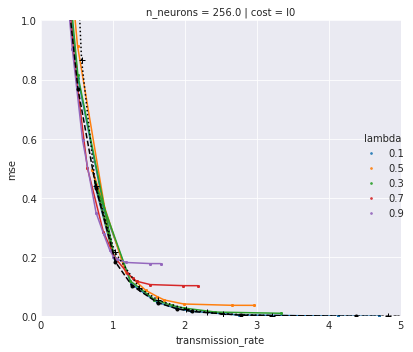

In [80]:
pf.full_comparison_plots(rd_all_uniform, pca_table=rd_rg_uniform, ica_table=rd_ica_uniform, x='transmission_rate', ylim=1)

# Model comparisons

In [76]:
rd_pca_v2 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/alt_mods/coeffs/v2/rd_pca_v2')

In [46]:
rd_pca_v3 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/alt_mods/coeffs/v2/rd_pca_nozero')

In [93]:
rd_pca_7_15 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/alt_mods/coeffs/v2/rd_pca_7_15')

In [43]:
rd_lca_lloyd = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_lca_lloyd')

In [60]:
rd_ica_lloyd = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica/coeffs/rd_ica_lloyd')

In [20]:
rd_lloyd.to_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_lca_lloyd')

In [3]:
rd_lca = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_256_512_l0')

In [44]:
rd_lca_v3 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_256_v3')

In [116]:
rd_lca_7_15 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_256_7_15')

In [4]:
rd_alts = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/alt_mods/coeffs/rd_alts')

In [107]:
rd_ica_7_15 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica/coeffs/rd_ica_7_15')

In [48]:
rd_ica_v3 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica/coeffs/rd_ica_v3')

In [6]:
rd_lca_l1= pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_512_l1')

In [7]:
rd_512_1_3_5 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_512')

In [8]:
rd_256 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_256_l0')

In [29]:
rd_256_l1 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_256_l1')

In [39]:
rd_256_l1_4_5 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_256_l1_4_5')

In [31]:
rd_512_2_4 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_512_l0_2_4')

In [9]:
rd_ica.model = ['ica'] * len(rd_ica.model)

In [7]:
# frames = [rd_256, rd_512_1_3_5, rd_512_2_4, rd_lca_l1, rd_256_l1, rd_256_l1_4_5]
frames2 = [rd_alts, rd_ica]

In [108]:
frames3 = [rd_pca_v2, rd_pca_7_15, rd_ica, rd_ica_7_15]

In [49]:
frames = [rd_pca_v3, rd_ica_v3]

In [118]:
rd_lca = pd.concat(frames)

In [50]:
# rd_lca = pd.concat(frames)
rd_alts = pd.concat(frames)

In [51]:
rd_alts = rd_alts.sort_values(['model', 'n_bins'])

In [119]:
rd_lca = rd_lca.sort_values(['model', 'n_bins'])

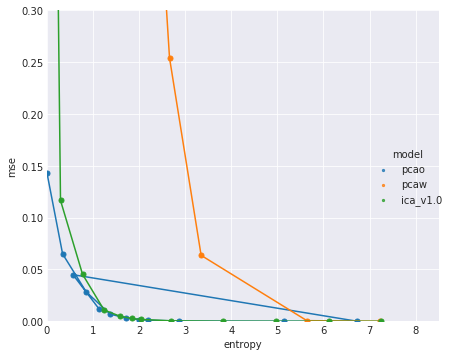

In [96]:
pf.alt_models_plots(rd_alts)

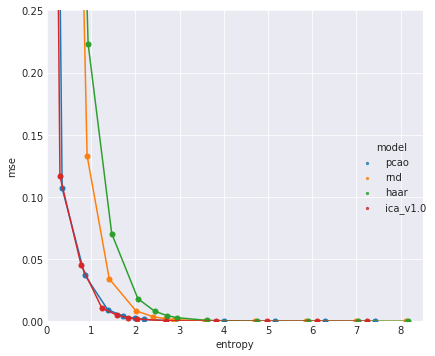

In [9]:
pf.alt_models_plots(rd_alts, y='mse', ylim=.25)

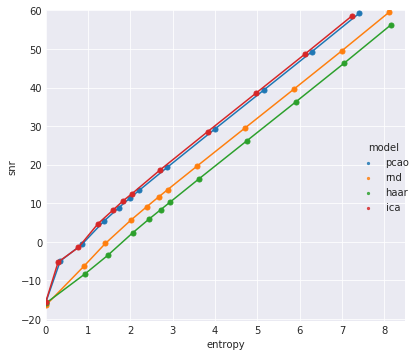

In [28]:
pf.alt_models_plots(rd_alts, y='snr', xlim=8.5, ylim=60)

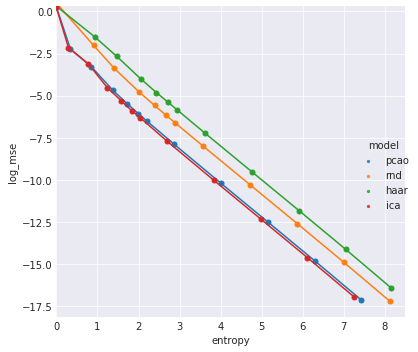

In [27]:
pf.alt_models_plots(rd_alts, y='log_mse', xlim=8.5)

## second attempt

In [150]:
rd_lca2 = rd_lca_v3.where(rd_lca_v3['lambda'] != '0.1')

In [136]:
rd_alts

,cost,entropy,lambda,log_mse,model,mse,mse_sd,n_bins,n_neurons,overcompleteness,p_active,psnr,snr,transmission_rate
0,None,0.000000,None,0.243501,ica_v1.0,1.275707e+00,6.101652e-01,1,256,1.0,1.0,NaN,-15.652310,0.000000
1,None,0.294116,None,-2.148713,ica_v1.0,1.166342e-01,5.916952e-02,5,256,1.0,1.0,NaN,-5.242044,0.294116
0,None,0.488936,None,-2.552912,ica_v1.0,7.785463e-02,3.147043e-02,7,256,1.0,1.0,11.421086,NaN,0.488936
2,None,0.772537,None,-3.093877,ica_v1.0,4.532591e-02,1.443172e-02,10,256,1.0,1.0,NaN,-1.481482,0.772537
1,None,1.022898,None,-3.901383,ica_v1.0,2.021394e-02,6.822829e-03,15,256,1.0,1.0,17.161517,NaN,1.022898
3,None,1.238735,None,-4.517607,ica_v1.0,1.091511e-02,3.709725e-03,20,256,1.0,1.0,NaN,4.729197,1.238735
4,None,1.581234,None,-5.303811,ica_v1.0,4.972607e-03,1.680845e-03,30,256,1.0,1.0,NaN,8.140042,1.581234
5,None,1.836702,None,-5.891423,ica_v1.0,2.763043e-03,9.573150e-04,40,256,1.0,1.0,NaN,10.703913,1.836702
6,None,2.042235,None,-6.306301,ica_v1.0,1.824771e-03,6.314082e-04,50,256,1.0,1.0,NaN,12.502877,2.042235
7,None,2.700957,None,-7.713713,ica_v1.0,4.466599e-04,1.535170e-04,100,256,1.0,1.0,NaN,18.614324,2.700957


In [ ]:
rd_rg_

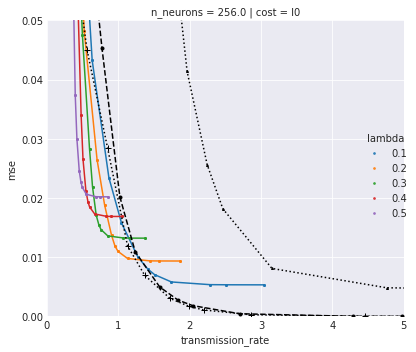

In [81]:
pf.full_comparison_plots(rd_lca_v3.where(rd_lca_v3['n_neurons'] == 256), pca_table=rd_alts.where(rd_alts.model=='pcao'), rnd_table=rd_rg_uniform_v2, ica_table=rd_alts.where(rd_alts.model=='ica_v1.0'), y='mse', x='transmission_rate',xlim=5.0,  ylim=0.05)


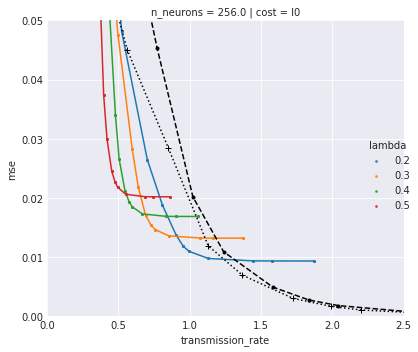

In [151]:
pf.full_comparison_plots(rd_lca2.where(rd_lca2['n_neurons'] == 256), pca_table=rd_alts.where(rd_alts.model=='pcao'), ica_table=rd_alts.where(rd_alts.model=='ica_v1.0'), y='mse', x='transmission_rate',xlim=2.5,  ylim=0.05)




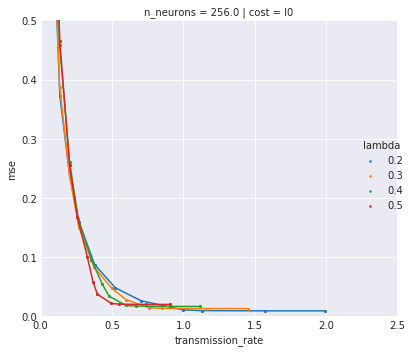

In [133]:
pf.full_comparison_plots(rd_lca2.where(rd_lca2['n_neurons'] == 256), y='mse', x='transmission_rate',xlim=2.5,  ylim=.5)


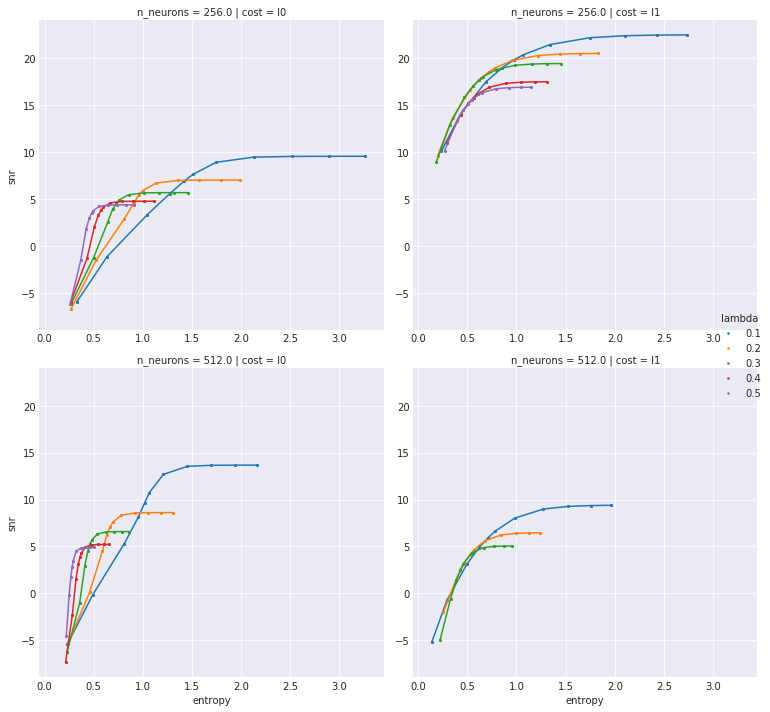

In [53]:
pf.full_comparison_plots(rd_lca.where(rd_lca.mse < .2), y='snr', x='entropy', ylim=.1)

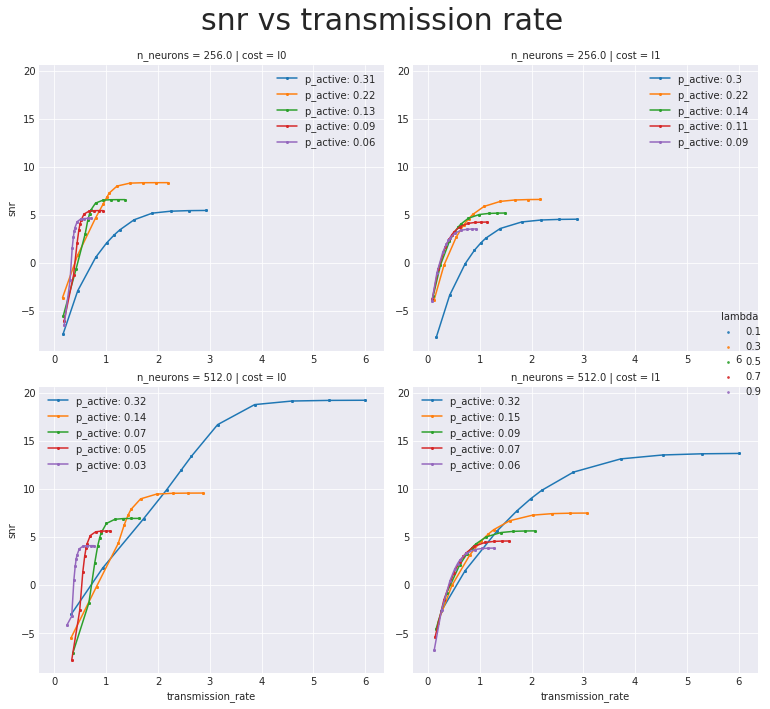

In [28]:
pf.full_comparison_plots(rd_all,  y = "snr", x='transmission_rate', ylim=.2, xlim=7, title='snr vs transmission rate')

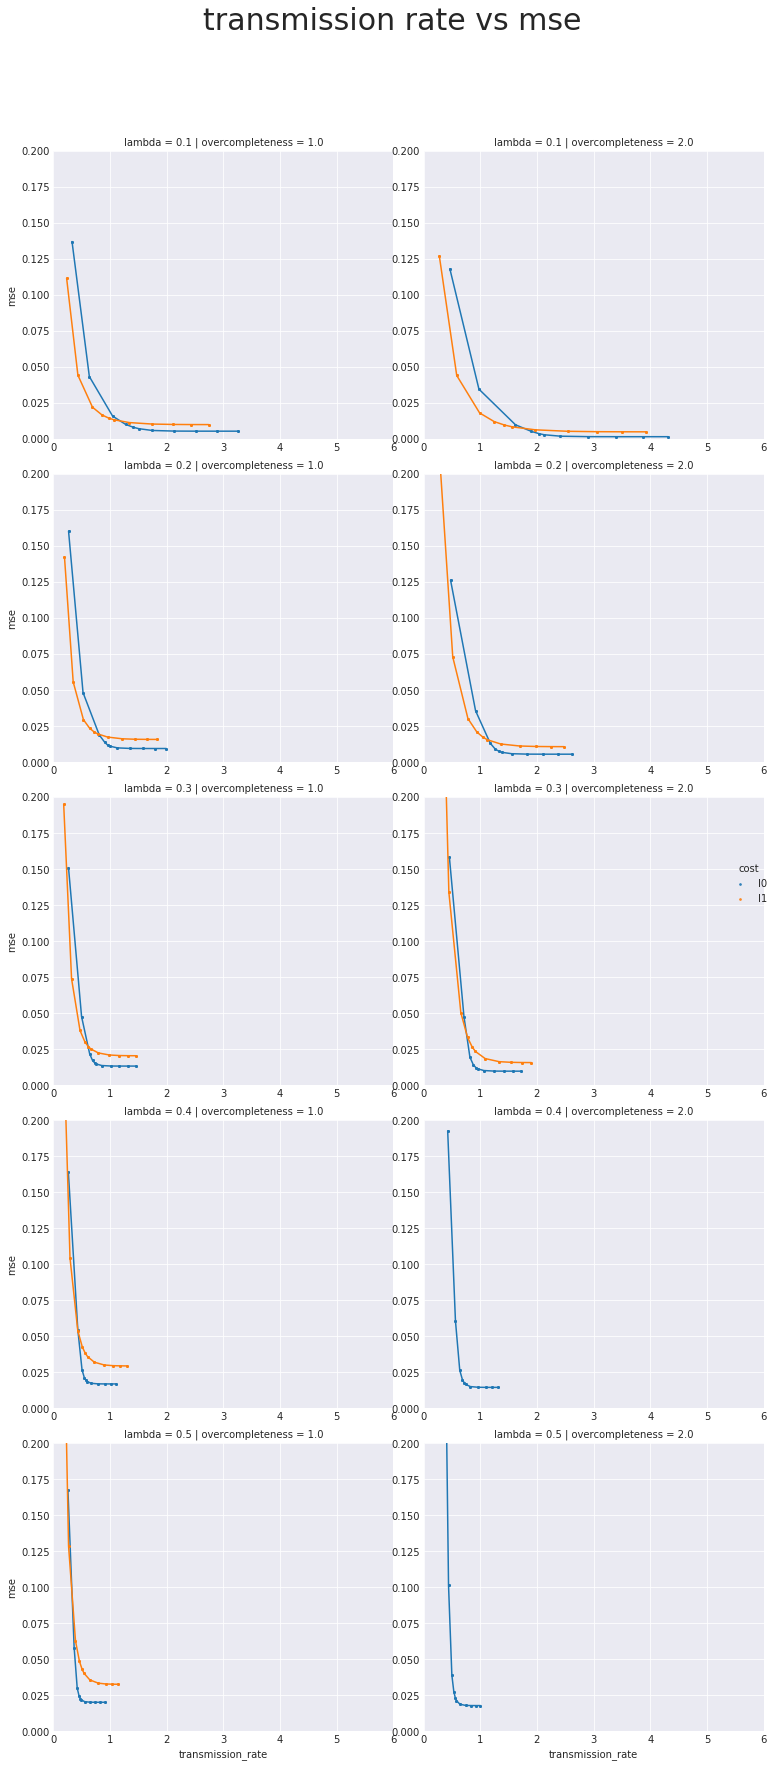

In [45]:
pf.full_comparison_plots(rd_lca, xlim=6, ylim=.2, x='transmission_rate', y='mse', title='transmission rate vs mse', row='lambda', col='overcompleteness', hue='cost')

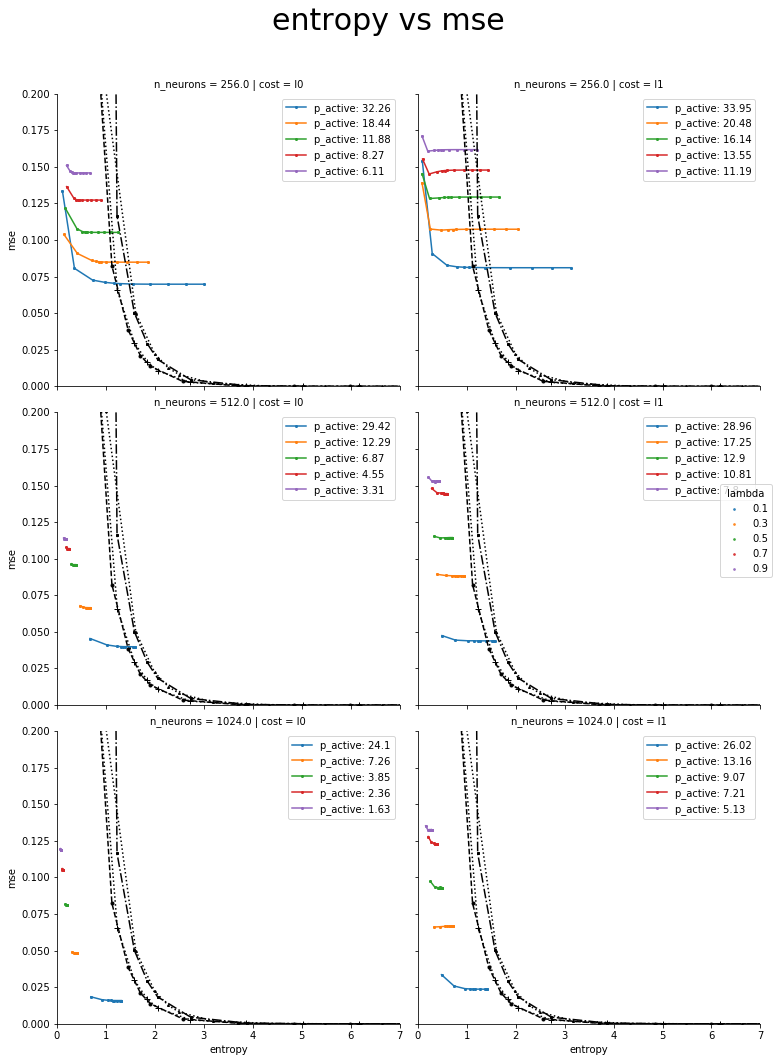

In [36]:
pf.full_comparison_plots(rd_lca, rd_ica, rd_pcao, rd_rnd, rd_sym, x='entropy', ylim=.2, xlim=7, title='entropy vs mse')

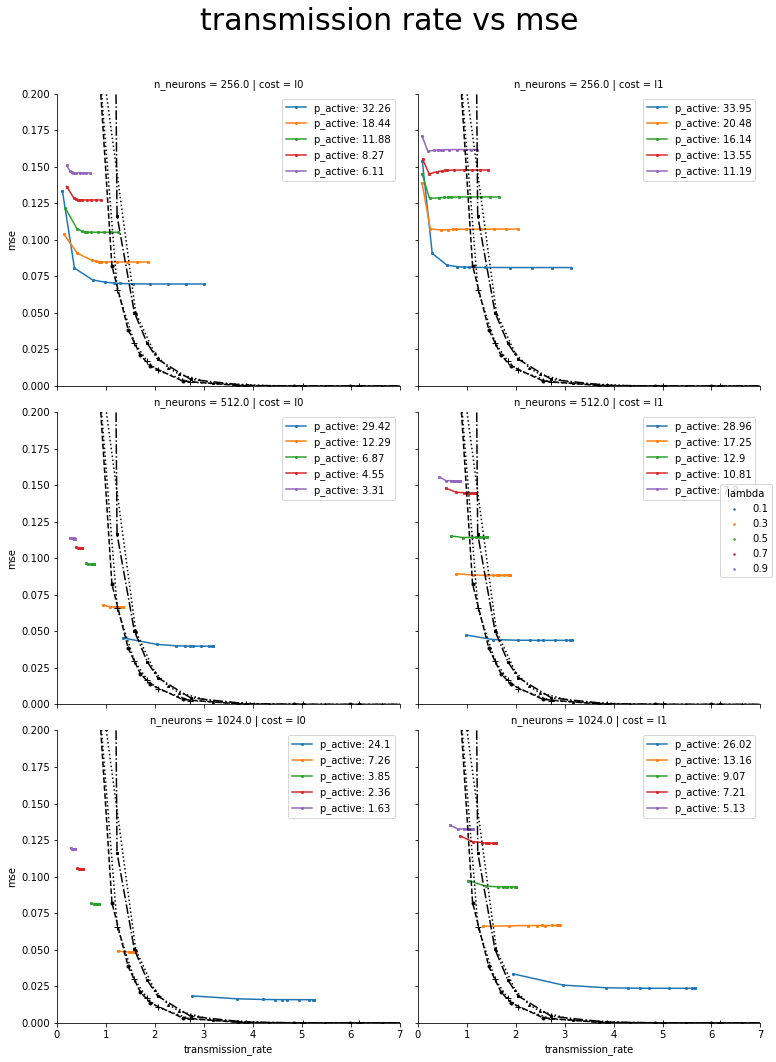

In [38]:
full_comparison_plots(rd_lca, rd_ica, rd_pcao, rd_rnd, rd_sym, x='transmission_rate', ylim=.2, xlim=7, title='transmission rate vs mse')

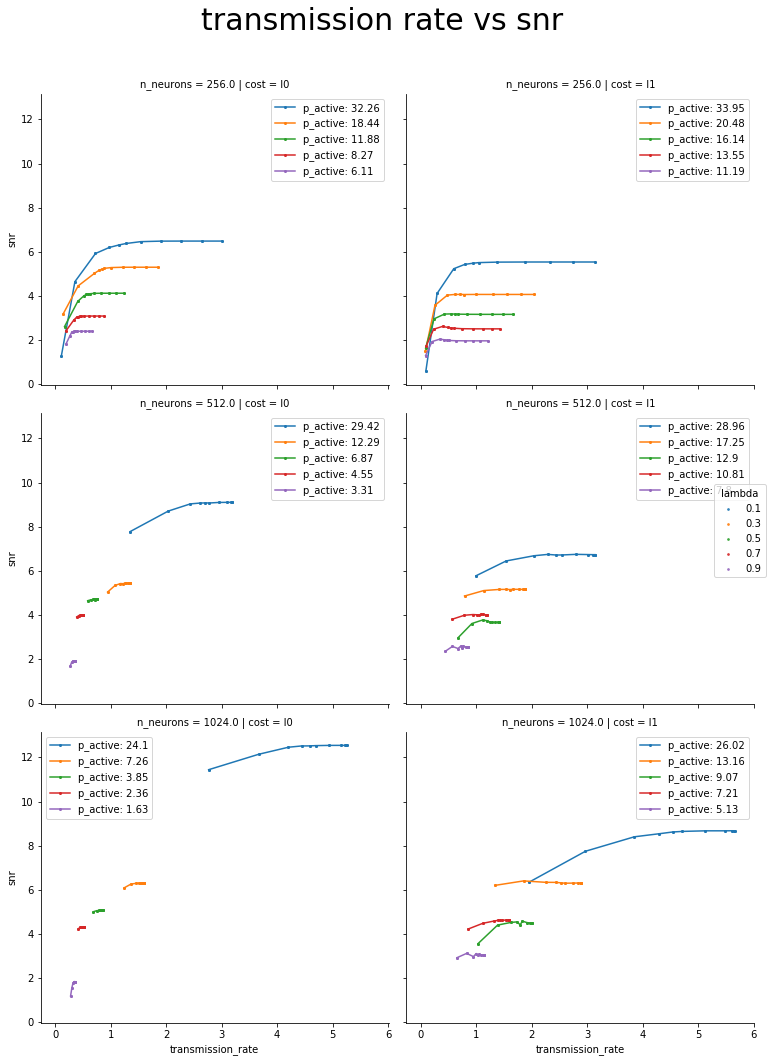

In [29]:
full_comparison_plots(rd_lca, x='transmission_rate', y='snr', title='transmission rate vs snr')

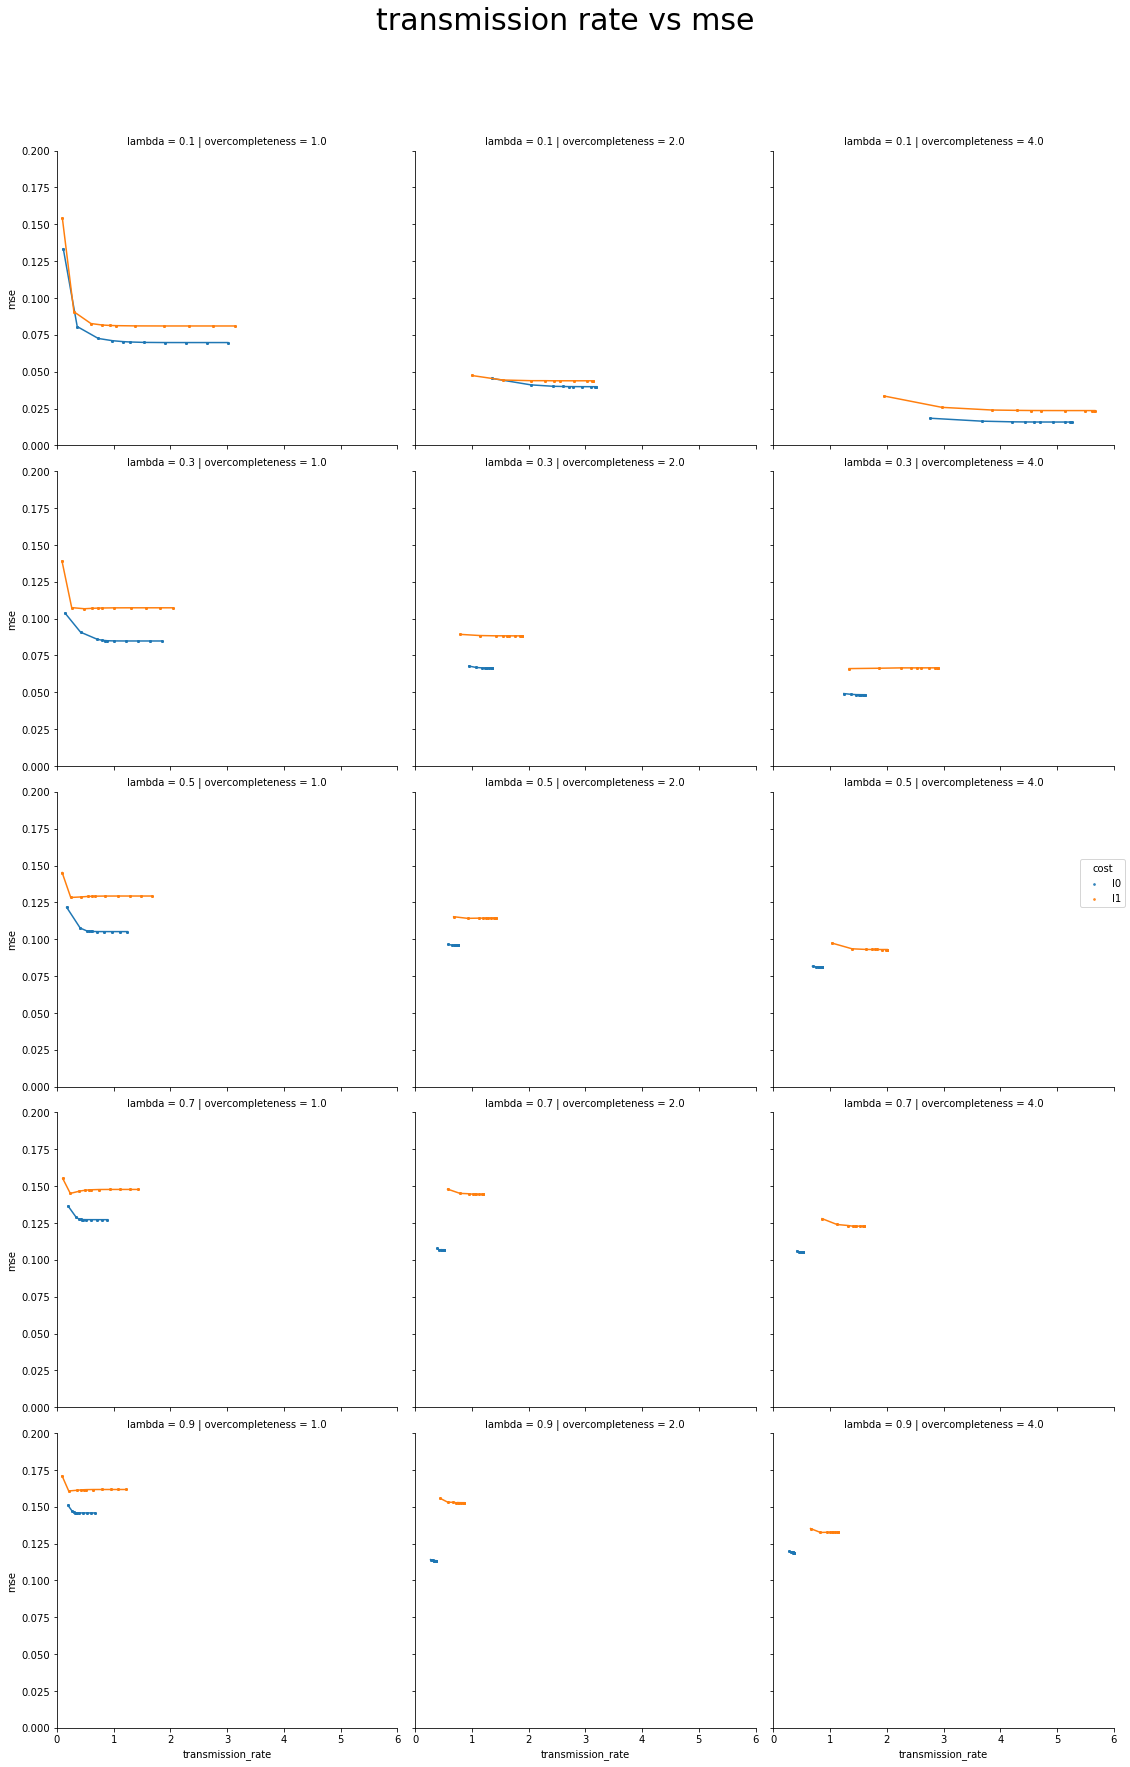

In [27]:
full_comparison_plots(rd_lca, xlim=6, ylim=.2, x='transmission_rate', y='mse', title='transmission rate vs mse', row='lambda', col='overcompleteness', hue='cost')